Lawson R. "On my honor, as a student, I have
neither given nor received unauthorized aid on this academic work."

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

/Users/lawson_roberts1/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_excel("data/train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [3]:
df = df.drop('FAKEID', axis=1)
df.head()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 18 columns):
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(6)
memory usage: 1.3+ MB


In [5]:
df = df.replace(' ', np.nan)
df.head()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,0,0,0,1,1,1,15,8,1,94.0,4.0,NaN,0.0,1.0,NaN,NaN,77,203
1,1,0,0,1,0,1,15,3,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,53,68
2,1,1,0,0,0,1,15,11,1,67.0,2.0,NaN,0.0,1.0,0.0,NaN,50,38
3,1,1,0,1,0,1,15,4,0,62.0,4.0,NaN,1.0,1.0,0.0,1.0,60,68
4,0,0,0,1,0,0,15,5,0,89.0,4.0,NaN,1.0,1.0,0.0,NaN,65,194


In [6]:
df.isnull().sum()

Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE         1993
INCOME      1944
CHILD       8634
GNDR         498
OWNHOME     1999
SPORT       4943
COMP        8207
PCTMARR        0
HOMEVAL        0
dtype: int64

In [7]:
print df['AGE'].mean()
print df['INCOME'].mean()
print df['SPORT'].mean()

61.3929115326
2.88215071507
0.0568687105078


I will replace all of these columns with the average values

In [8]:
df.groupby('OWNHOME').size()

OWNHOME
0.0    2031
1.0    5186
dtype: int64

Will replace all null values with 1 for owning a home

In [9]:
df.groupby('GNDR').size()

GNDR
0.0    4819
1.0    3899
dtype: int64

Will replace all null values with Female

In [10]:
df.groupby('CHILD').size()

CHILD
1.0    582
dtype: int64

Becasue there are so many missing values or so few people who have a child 0-18 I am deciding to drop this column. I am doing the same with the COMP variable. 

In [11]:
df = df.drop('CHILD', axis=1)
df = df.drop('COMP', axis=1)
df.head()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,0,0,0,1,1,1,15,8,1,94.0,4.0,0.0,1.0,NaN,77,203
1,1,0,0,1,0,1,15,3,1,NaN,NaN,0.0,0.0,NaN,53,68
2,1,1,0,0,0,1,15,11,1,67.0,2.0,0.0,1.0,0.0,50,38
3,1,1,0,1,0,1,15,4,0,62.0,4.0,1.0,1.0,0.0,60,68
4,0,0,0,1,0,0,15,5,0,89.0,4.0,1.0,1.0,0.0,65,194


In [12]:
df = df.fillna({'AGE' : 61})
df = df.fillna({'COMP' : 0})
df = df.fillna({'SPORT' : 0})
df = df.fillna({'OWNHOME' : 1})
df = df.fillna({'GNDR' : 0})
df = df.fillna({'INCOME' : 3})
df.isnull().sum()

Y2defect    0
Y1G5        0
Y1G4        0
Y1G3        0
Y1G2        0
Y1G1        0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
GNDR        0
OWNHOME     0
SPORT       0
PCTMARR     0
HOMEVAL     0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 16 columns):
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null float64
INCOME      9216 non-null float64
GNDR        9216 non-null float64
OWNHOME     9216 non-null float64
SPORT       9216 non-null float64
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(5), int64(11)
memory usage: 1.1 MB


In [14]:
df.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.101921,0.028869,-0.040159,-0.109634,-0.141604,-0.023498,-0.139099,-0.189929,-0.023916,0.010530,0.007248,-0.018063,0.011944,-0.023869,0.029722
Y1G5,-0.101921,1.000000,0.092901,-0.150656,0.116103,0.123291,0.043975,0.121479,0.045319,0.029899,-0.000865,-0.005599,0.021317,0.005457,0.008064,-0.000382
Y1G4,0.028869,0.092901,1.000000,-0.082485,-0.076326,-0.094967,-0.003481,-0.095750,-0.090743,-0.061950,0.006825,0.002400,0.043924,0.017533,0.001259,0.001030
Y1G3,-0.040159,-0.150656,-0.082485,1.000000,-0.091538,-0.135977,-0.045239,-0.100829,0.005308,-0.028564,0.020746,0.000198,-0.029841,-0.002252,-0.006574,0.001812
Y1G2,-0.109634,0.116103,-0.076326,-0.091538,1.000000,0.206763,0.061990,0.320802,0.276530,0.100051,-0.013631,-0.009714,-0.002148,0.003123,0.019234,-0.013760
Y1G1,-0.141604,0.123291,-0.094967,-0.135977,0.206763,1.000000,-0.003982,0.244241,0.256153,0.087666,-0.028290,-0.025717,-0.002415,0.004151,0.024756,-0.014693
Y1price,-0.023498,0.043975,-0.003481,-0.045239,0.061990,-0.003982,1.000000,0.043768,-0.090287,-0.028649,0.071470,0.042429,-0.018103,0.010261,0.008032,0.095580
YEARS,-0.139099,0.121479,-0.095750,-0.100829,0.320802,0.244241,0.043768,1.000000,0.533836,0.286248,-0.089712,-0.020403,-0.003753,-0.022063,0.023691,-0.049689
BACKER,-0.189929,0.045319,-0.090743,0.005308,0.276530,0.256153,-0.090287,0.533836,1.000000,0.184036,-0.084987,-0.029201,-0.008838,-0.020048,0.032558,-0.064727
AGE,-0.023916,0.029899,-0.061950,-0.028564,0.100051,0.087666,-0.028649,0.286248,0.184036,1.000000,-0.214986,0.015882,-0.038427,-0.017194,-0.050937,-0.014367


Now our data should be cleaned up and ready to go.

# Model Development

In [15]:
X = df.drop(['Y2defect'], axis = 1)
y = df['Y2defect']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.5468354430379747
--------------------------------------------------------
[[747 616]
 [637 765]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.54      0.55      0.54      1363
          1       0.55      0.55      0.55      1402

avg / total       0.55      0.55      0.55      2765

--------------------------------------------------------
0.5468524160537875


In [18]:
pd.DataFrame({'feature':X.columns, 'importance':dt.feature_importances_})

,feature,importance
0,Y1G5,0.022784
1,Y1G4,0.023591
2,Y1G3,0.016682
3,Y1G2,0.025875
4,Y1G1,0.029525
5,Y1price,0.030416
6,YEARS,0.118642
7,BACKER,0.017996
8,AGE,0.167592
9,INCOME,0.079680


In [19]:
final_model = RandomForestClassifier(n_estimators=50)    #building 50 decision trees
final_model =final_model.fit(X, y)
final_model.score(X,y)

0.9996744791666666

In [20]:
print metrics.roc_auc_score(y_test, final_model.predict(X_test))

1.0


In [21]:
pd.DataFrame({'feature':X.columns, 'importance':final_model.feature_importances_})

,feature,importance
0,Y1G5,0.025494
1,Y1G4,0.026458
2,Y1G3,0.024767
3,Y1G2,0.020617
4,Y1G1,0.031034
5,Y1price,0.036495
6,YEARS,0.126081
7,BACKER,0.031688
8,AGE,0.160239
9,INCOME,0.083219


In [22]:
X_new = SelectKBest(chi2, k=3).fit_transform(X, y)
print X_new

[[  8.   1. 203.]
 [  3.   1.  68.]
 [ 11.   1.  38.]
 ...
 [  6.   0.  95.]
 [  7.   1.  37.]
 [  7.   1. 344.]]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.5464737793851718
--------------------------------------------------------
[[837 526]
 [728 674]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.53      0.61      0.57      1363
          1       0.56      0.48      0.52      1402

avg / total       0.55      0.55      0.54      2765

--------------------------------------------------------
0.5474141855833246


In [25]:
y = df['Y2defect']
X = df[['BACKER', 'AGE', 'YEARS']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.5435804701627487
--------------------------------------------------------
[[831 532]
 [730 672]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.53      0.61      0.57      1363
          1       0.56      0.48      0.52      1402

avg / total       0.55      0.54      0.54      2765

--------------------------------------------------------
0.5444998916755541


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.5919622214570319


# Model Delpoyment

In [30]:
df2 = pd.read_excel("data/validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [31]:
df2 = df2.replace(' ', np.nan)
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4.0,NaN,0.0,1.0,0.0,NaN,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5.0,NaN,0.0,NaN,0.0,NaN,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,NaN,NaN,0.0,0.0,NaN,1.0,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4.0,1.0,0.0,1.0,NaN,NaN,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4.0,NaN,1.0,1.0,0.0,NaN,65,110


In [32]:
df2 = df2.drop('CHILD', axis=1)
df2 = df2.drop('COMP', axis=1)
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4.0,0.0,1.0,0.0,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5.0,0.0,NaN,0.0,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,NaN,0.0,0.0,NaN,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4.0,0.0,1.0,NaN,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4.0,1.0,1.0,0.0,65,110


In [33]:
df2 = df2.fillna({'AGE' : 61})
df2 = df2.fillna({'COMP' : 0})
df2 = df2.fillna({'SPORT' : 0})
df2 = df2.fillna({'OWNHOME' : 1})
df2 = df2.fillna({'GNDR' : 0})
df2 = df2.fillna({'INCOME' : 3})
df2.isnull().sum()

FAKEID         0
Y3defect    9542
Y2G5           0
Y2G4           0
Y2G3           0
Y2G2           0
Y2G1           0
Y2price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
GNDR           0
OWNHOME        0
SPORT          0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [34]:
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [35]:
validation = df2.drop(['FAKEID','Y3defect'], axis = 1)
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 15 columns):
Y2G5       9542 non-null int64
Y2G4       9542 non-null int64
Y2G3       9542 non-null int64
Y2G2       9542 non-null int64
Y2G1       9542 non-null int64
Y2price    9542 non-null int64
YEARS      9542 non-null int64
BACKER     9542 non-null int64
AGE        9542 non-null float64
INCOME     9542 non-null float64
GNDR       9542 non-null float64
OWNHOME    9542 non-null float64
SPORT      9542 non-null float64
PCTMARR    9542 non-null int64
HOMEVAL    9542 non-null int64
dtypes: float64(5), int64(10)
memory usage: 1.1 MB


In [36]:
# applying the decision tree model to validation dataset
output_scoring = final_model.predict(validation)

# generating probability for defect for each fan
probs = final_model.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_excel("data/submissionentry.xlsx", index=False)

# Business and data understanding

In [37]:
df.corr()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,SPORT,PCTMARR,HOMEVAL
Y2defect,1.000000,-0.101921,0.028869,-0.040159,-0.109634,-0.141604,-0.023498,-0.139099,-0.189929,-0.023916,0.010530,0.007248,-0.018063,0.011944,-0.023869,0.029722
Y1G5,-0.101921,1.000000,0.092901,-0.150656,0.116103,0.123291,0.043975,0.121479,0.045319,0.029899,-0.000865,-0.005599,0.021317,0.005457,0.008064,-0.000382
Y1G4,0.028869,0.092901,1.000000,-0.082485,-0.076326,-0.094967,-0.003481,-0.095750,-0.090743,-0.061950,0.006825,0.002400,0.043924,0.017533,0.001259,0.001030
Y1G3,-0.040159,-0.150656,-0.082485,1.000000,-0.091538,-0.135977,-0.045239,-0.100829,0.005308,-0.028564,0.020746,0.000198,-0.029841,-0.002252,-0.006574,0.001812
Y1G2,-0.109634,0.116103,-0.076326,-0.091538,1.000000,0.206763,0.061990,0.320802,0.276530,0.100051,-0.013631,-0.009714,-0.002148,0.003123,0.019234,-0.013760
Y1G1,-0.141604,0.123291,-0.094967,-0.135977,0.206763,1.000000,-0.003982,0.244241,0.256153,0.087666,-0.028290,-0.025717,-0.002415,0.004151,0.024756,-0.014693
Y1price,-0.023498,0.043975,-0.003481,-0.045239,0.061990,-0.003982,1.000000,0.043768,-0.090287,-0.028649,0.071470,0.042429,-0.018103,0.010261,0.008032,0.095580
YEARS,-0.139099,0.121479,-0.095750,-0.100829,0.320802,0.244241,0.043768,1.000000,0.533836,0.286248,-0.089712,-0.020403,-0.003753,-0.022063,0.023691,-0.049689
BACKER,-0.189929,0.045319,-0.090743,0.005308,0.276530,0.256153,-0.090287,0.533836,1.000000,0.184036,-0.084987,-0.029201,-0.008838,-0.020048,0.032558,-0.064727
AGE,-0.023916,0.029899,-0.061950,-0.028564,0.100051,0.087666,-0.028649,0.286248,0.184036,1.000000,-0.214986,0.015882,-0.038427,-0.017194,-0.050937,-0.014367


My First Hypothesis is that the variable years will not be equal across those who defect and those who renew their season ticket.

My Second Hypothesis is that the variable Backer will not be equal across those who defect and those who renew their season ticket.

I want to test both of these variables through t testing becuase they both show high correlation. T testing will prove both of these variables are significant.

# Data visualization: This section includes many charts, pivot tables, and other
visualizations using matplotlib, seaborn, groupby, pivot, etc.

In [38]:
YEARS = df.groupby(['YEARS', 'Y2defect']).size().unstack()
YEARS

Y2defect,0,1
YEARS,,
2,3.0,242.0
3,671.0,1193.0
4,580.0,542.0
5,456.0,379.0
6,585.0,402.0
7,495.0,369.0
8,320.0,250.0
9,492.0,395.0
10,467.0,379.0


In [39]:
BACKER = df.groupby(['BACKER', 'Y2defect']).size().unstack()
BACKER

Y2defect,0,1
BACKER,,
0,1915,2790
1,2693,1818


In [40]:
Defect = df.groupby('Y2defect').size()
Defect

Y2defect
0    4608
1    4608
dtype: int64

In [41]:
defect_years = pd.crosstab(df['Y2defect'], df['YEARS']).apply(lambda r: r/r.sum(), axis=0).T
defect_years.rename(columns = {0:'renew', 1:'defect'}, inplace=True)
defect_years

Y2defect,renew,defect
YEARS,,
2,0.012245,0.987755
3,0.359979,0.640021
4,0.516934,0.483066
5,0.546108,0.453892
6,0.592705,0.407295
7,0.572917,0.427083
8,0.561404,0.438596
9,0.554679,0.445321
10,0.552009,0.447991


In [42]:
defect_backer = pd.crosstab(df['Y2defect'], df['BACKER']).apply(lambda r: r/r.sum(), axis=0).T
defect_backer.rename(columns = {0:'renew', 1:'defect'}, inplace=True)
defect_backer

Y2defect,renew,defect
BACKER,,
0,0.407014,0.592986
1,0.596985,0.403015


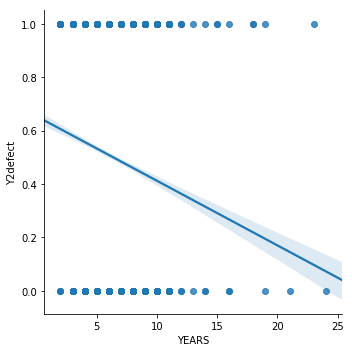

In [43]:
sns.lmplot('YEARS', 'Y2defect', df)

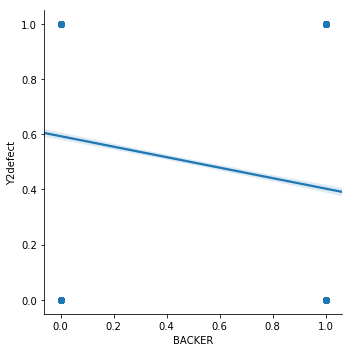

In [44]:
sns.lmplot('BACKER', 'Y2defect', df)

Y2defect
0    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

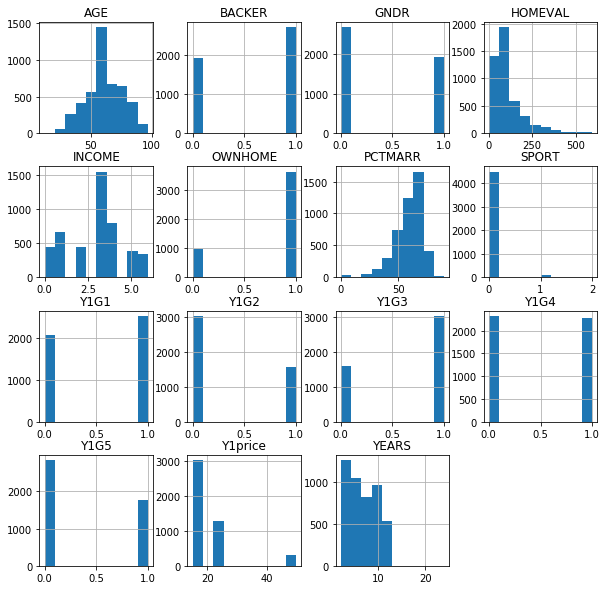

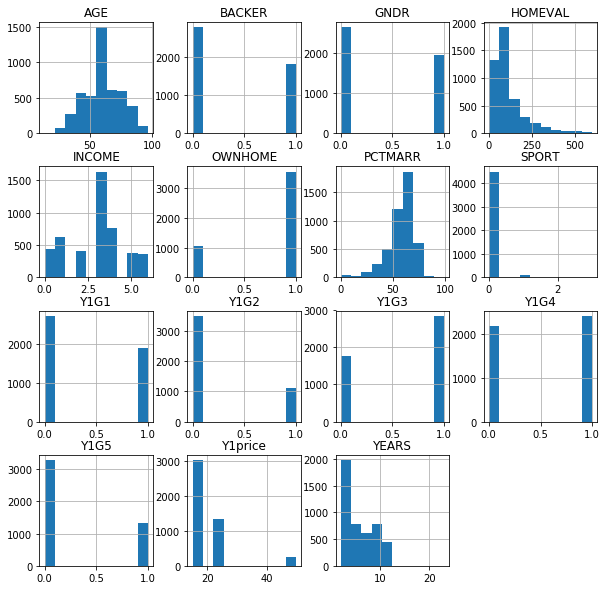

In [45]:
df.groupby('Y2defect').hist(figsize=(10,10))

/Users/lawson_roberts1/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


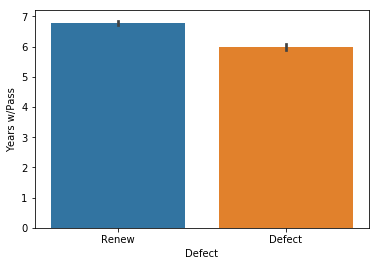

In [46]:
ax = sns.barplot(x="Y2defect", y="YEARS", data=df, ci=95)
ax.set(xlabel='Defect', ylabel='Years w/Pass')
ax.set_xticklabels(['Renew', 'Defect'])
plt.show();

# Exploratory data analysis: This section includes correlation analysis, pairwise
heatmaps, and statistical hypothesis tests (e.g., t-testing, ANOVA)

In [47]:
#heatmap

from bokeh.charts import HeatMap, bins, show, output_file

hm1 = HeatMap(df, x='Y2defect', y='INCOME')
show(hm1)

/Users/lawson_roberts1/anaconda2/lib/python2.7/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)
No handlers could be found for logger "/Users/lawson_roberts1/anaconda2/lib/python2.7/site-packages/bokeh/core/validation/check.pyc"


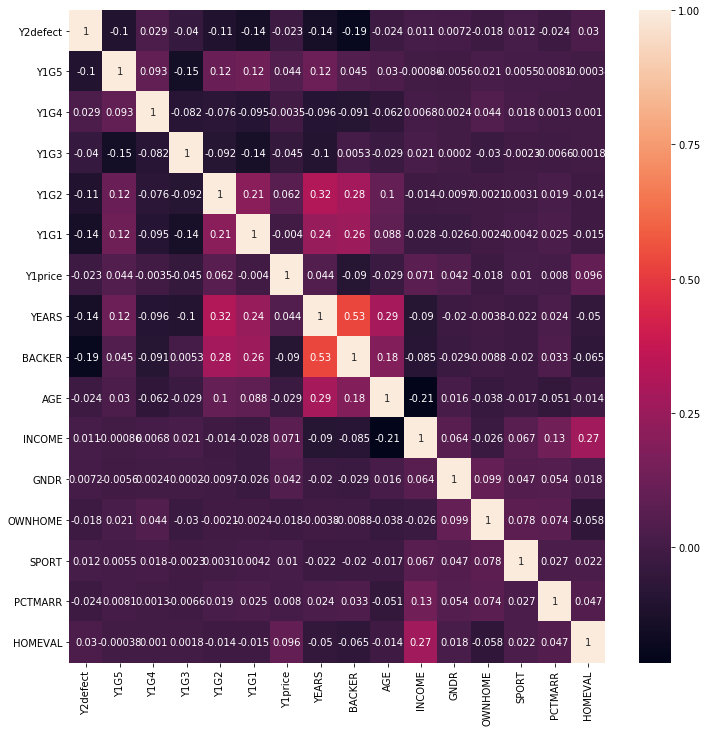

In [48]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [49]:
renew = df[df['Y2defect'] == 0]['YEARS']
defect = df[df['Y2defect'] == 1]['YEARS']
two_sample = stats.ttest_ind(renew, defect)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is 13.483 and the p-value is 0.000.


In [50]:
renew = df[df['Y2defect'] == 0]['BACKER']
defect = df[df['Y2defect'] == 1]['BACKER']
two_sample = stats.ttest_ind(renew, defect)
print "The t-statistic is %.3f and the p-value is %.3f." % two_sample

The t-statistic is 18.569 and the p-value is 0.000.


# Demonstrate your storytelling skills

After testing both of our original business questions. We see that both YEARS and BACKER values differ from those who renew the season pass and those who fail to renew. This is known because the pvalue is 0 meaning this is a significant variable in determining the defect value. 

Discuss managerial implications of your classification models for K-State Athletic Department. What variables are important in predicting ticket defect? And how important are they? What are the characteristics of the ticket holders who are likely to leave? Perhaps, this is the most important part of this HW porject.

The ticket office need to looke at the number of years someone has had a ticket and speficially those who have had the ticket 2-3 years because this seems to be a big decision maker. Whether the ticket holder is a BACKER club member or not is important. Also if the ticket holder went to the first two games and the last home game seems to be an important factor. All together it isnt easy to predict if people will renew. The models can work their way up to 60 percent accuracy without resorting to random forest regression.  

There could be more variables added to this list that I feel would be important when ticket holders are deciding to renew or not.
1.) Number of games won by the team in the last season.
2.) Enrollment of the school. Specifically if the enrollment is going up.
3.) Number of returning players from the previous season. Or projected ranking preseason.